In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
# from google.colab import files
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
GSP = pd.read_csv(r"C:\Users\MATIS\Downloads\adult.data",
                 sep = ',',
                 thousands=',', decimal='.',
                 skip_blank_lines=False, header = None)

GSP.columns = ["age","workclass","fnlwgt" ,"education","education-num","marital-status","occupation","relationship",
               "race","sex","capital-gain","capital-loss","hours-per-week","native country","50K"]


GSP

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,50K
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
32560,52.0,Self-emp-inc,287927.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0.0,40.0,United-States,>50K


### Correcciones 2 entrega:

Dado las pautas para las modificaciones al proyecto, en la consistencia de datos se hace un reemplazo en la variables: workclass, occupation, native country, dado que las respuestas de las personas encuestadas se registraban completamente aunque se denotaran con un "?" signo de pregunta, lo que genero cierta inconsistencia para representarlo como NaN's, después de esto se hace limpieza a la base nuevamente. 

In [3]:
# missing values 
GSP.isnull().sum()

age               1
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native country    1
50K               1
dtype: int64

In [4]:
GSP['workclass'].replace(' ?', np.nan, inplace = True)

In [5]:
GSP['occupation'].replace(' ?', np.nan, inplace = True)

In [6]:
GSP['native country'].replace(' ?', np.nan, inplace = True)

In [7]:
GSP.isnull().sum()

age                  1
workclass         1837
fnlwgt               1
education            1
education-num        1
marital-status       1
occupation        1844
relationship         1
race                 1
sex                  1
capital-gain         1
capital-loss         1
hours-per-week       1
native country     584
50K                  1
dtype: int64

In [8]:
GSP.dropna(subset=["workclass","occupation","native country"],inplace=True) 

In [9]:
GSP

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,50K
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [10]:
GSP.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native country    0
50K               0
dtype: int64

#One Hote Encoder 

#### Otra corrección de la entrega anterior:
Dado que en una matriz de correlaciones no se pueden relacionar variables cuantitativas asignandoles un valor, se realiza una factorización para categorizar en una variable númerica, y nuevamente uniendola en una nueva base. 

In [11]:
#Data Preprocessing
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in GSP.columns if GSP.dtypes[col] == 'object']

In [12]:
# creating list of numerical columns to standardized data 
numerical_columns = [col for col in GSP.columns if (GSP.dtypes[col] != 'object')]

print('Numerical Features are : ',numerical_columns)
print('\n')
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Categorical Features are :  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native country', '50K']


In [13]:
GSP["workclass"].factorize()

(array([0, 1, 2, ..., 2, 2, 5], dtype=int64),
 Index([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'],
       dtype='object'))

In [14]:
GSPn = pd.DataFrame(GSP, columns = ["workclass", "education","marital-status","occupation","relationship", "race", "sex", 
                                   "native country", "50K"])

In [15]:
GSPn = GSPn.apply(lambda x: pd.factorize(x)[0])

##### GSPn = pd.get_dummies(GSPn)

##### GSP[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [16]:
GSPn = pd.concat([GSP[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']], GSPn], axis = 1)

##### Nueva base con limpieza y variables dummies. 

In [17]:
GSPn

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native country,50K
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,0,0,0,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,1,0,1,1,1,0,0,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,2,1,2,2,0,0,0,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,2,2,1,2,1,1,0,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,2,0,1,3,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0,2,6,1,9,2,0,1,0,0
32557,40.0,154374.0,9.0,0.0,0.0,40.0,2,1,1,8,1,0,0,0,1
32558,58.0,151910.0,9.0,0.0,0.0,40.0,2,1,6,0,4,0,1,0,0
32559,22.0,201490.0,9.0,0.0,0.0,20.0,2,1,0,0,3,0,0,0,0


In [18]:
GSPn.shape

(30162, 15)

#### Correlation Analysis

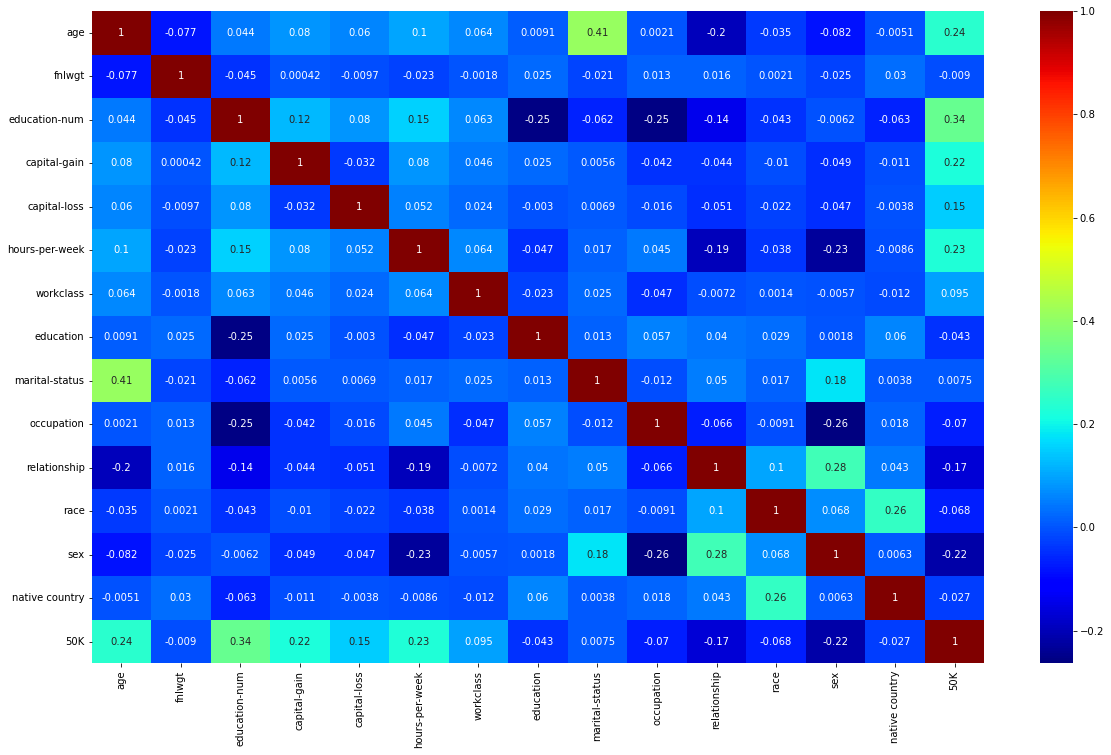

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(GSPn.corr(),annot=True,cmap='jet') #lista de colores, opcional, se asignan valores de datos al espacio de color. Si no se proporciona, el valor predeterminado dependerá de si se establece el centro.
#Si es Verdadero, se escribe el valor de los datos en cada celda. Si es similar a una matriz con la misma forma que los datos
plt.show()

Para la variable 50K que será la que vamos a predecir, las variables que mejor tienen relación directamente son "education num", "hours-per-week", "capitan-gain", "age", y aquellas que estan relacionadas inversamente son "sex". Pero más adelante se observará más detalladamente, la selección de variables.

### Selección de variables 

In [20]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#### Seleccion por Regresion Logistica

Feature: 0, Score: -0.27390
Feature: 1, Score: -0.14633
Feature: 2, Score: -0.08523
Feature: 3, Score: -0.02481
Feature: 4, Score: -0.15634
Feature: 5, Score: 0.71228
Feature: 6, Score: 1.57532
Feature: 7, Score: 0.15770
Feature: 8, Score: 0.04607
Feature: 9, Score: 0.24709
Feature: 10, Score: -0.02390
Feature: 11, Score: -0.16309
Feature: 12, Score: -0.09723
Feature: 13, Score: 0.57605
Feature: 14, Score: -0.22901


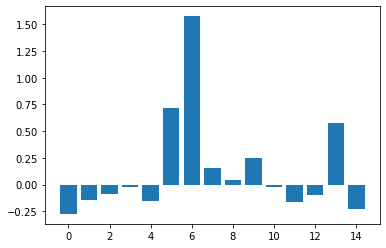

In [21]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=15, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [22]:
importance

array([-0.2738977 , -0.14633246, -0.08523223, -0.02480844, -0.1563404 ,
        0.71228372,  1.57532439,  0.15769618,  0.04607411,  0.24709462,
       -0.02389626, -0.16309361, -0.09723242,  0.57605245, -0.22901089])

Se observa que a pesar de la matriz de correlaciones, por el metodo de regresión logistica para que aquellas dummies que sean 0 su relación con las variables son aquellas que se encuentren en la parte negativa del gráfico, sería la 0 (age). y para aquellas positivas dummies (1) son 5 (hours-per-week), 6 (workclass), 13 (Native country). 

In [23]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier

#### Seleccion por CART

Feature: 0, Score: 0.05476
Feature: 1, Score: 0.01898
Feature: 2, Score: 0.01246
Feature: 3, Score: 0.02199
Feature: 4, Score: 0.02117
Feature: 5, Score: 0.06151
Feature: 6, Score: 0.59459
Feature: 7, Score: 0.02550
Feature: 8, Score: 0.01925
Feature: 9, Score: 0.04358
Feature: 10, Score: 0.02491
Feature: 11, Score: 0.02835
Feature: 12, Score: 0.02568
Feature: 13, Score: 0.01455
Feature: 14, Score: 0.03271


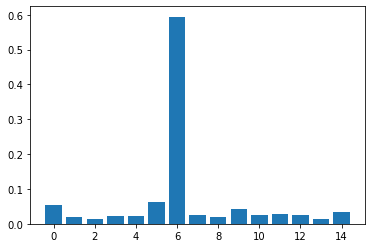

In [24]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=15, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Otro metodo de selección que se uso fue el CART, donde afirma que para la feature 6 es de mejor importancia la variable 6, workclass, y tiene sentido decir esto, porque en ciertos lugares depende la ocupación que la persona tenga para así mismo generar sus ingresos sean <50K o >50K.

### Evaluación de modelos 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score,plot_roc_curve,roc_curve,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [26]:
GSPn["50K"].value_counts() #observaciones 

0    22654
1     7508
Name: 50K, dtype: int64

### Datos desbalanceados: 

In [27]:
GSPn_uno = GSPn[GSPn["50K"] == 1]
GSPn_cero = GSPn[GSPn["50K"] == 0]

In [28]:
from sklearn.utils import resample
GSPn_down = resample(GSPn_cero,
             replace=True,
             n_samples=len(GSPn_uno),
             random_state=42)

In [29]:
data_downsampled = pd.concat([GSPn_down, GSPn_uno])
data_downsampled.reset_index(drop = True, inplace = True)
data_downsampled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native country,50K
0,49.0,190319.0,13.0,0.0,0.0,40.0,2,0,3,0,0,3,0,11,0
1,49.0,148995.0,9.0,0.0,0.0,40.0,2,1,2,0,0,0,0,0,0
2,42.0,445940.0,5.0,0.0,0.0,40.0,2,4,1,10,1,0,0,4,0
3,34.0,244064.0,9.0,0.0,0.0,40.0,2,1,0,8,4,1,0,0,0
4,36.0,272090.0,13.0,0.0,0.0,45.0,2,0,2,3,4,0,1,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15011,38.0,139180.0,13.0,15020.0,0.0,45.0,2,0,2,3,4,1,1,0,1
15012,39.0,111499.0,12.0,0.0,0.0,20.0,4,6,1,0,2,0,1,0,1
15013,53.0,321865.0,14.0,0.0,0.0,40.0,2,3,1,1,1,0,0,0,1
15014,40.0,154374.0,9.0,0.0,0.0,40.0,2,1,1,8,1,0,0,0,1


In [30]:
data_downsampled["50K"].value_counts()

0    7508
1    7508
Name: 50K, dtype: int64

En este caso consiste en ajustar parametros del propio algoritmo para intentar equilibrar a la clase minoritaria penalizando a la clase mayoritaria durante el entrenamiento. Podemos eliminar muestras de la clase mayoritaria para reducirlo e intentar equilibrar la situación.

In [31]:
X = data_downsampled.drop(columns=["50K"])
y = data_downsampled["50K"]

# Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50)

### Regresión logistica

Primero, se entrena un modelo de regresión logística con máximo de iteracción igual a 1000 y una semilla fijada en 123456.
El desempeño es de 62.44% y un AUC equivalente a 0.68 con el gráfico correspondiente. 
También se observa una matriz de confusión con buenos resultado, aunque en la clase >50K se predijo muy poco como tal,
unicamente 1206 de los 2238.

In [34]:
logit = LogisticRegression(random_state=123456,max_iter=1000) ## inicializar
logit.fit(X_train, y_train) 
y_pred = logit.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.6244173140954495

AUC: 0.68


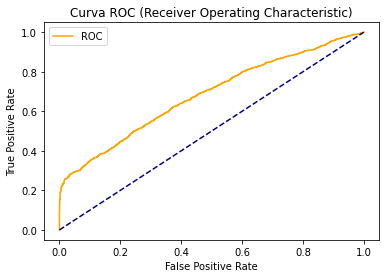

In [36]:
### Graficando Curva ROC
# predecir las probabilidades para el hold-out
probs = logit.predict_proba(X_test)
# Mantener las probabilidades de la clase positiva (1)
probs = probs[:, 1]
# Calcular el AUC (Área bajo la curva ROC)
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
# Obtener la curva ROC
fpr, tpr, umbral = roc_curve(y_test, probs)
# Graficar la curva ROC
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend()
plt.show()

In [37]:
pd.crosstab(y_test, y_pred)

col_0,0,1
50K,,
0,1607,660
1,1032,1206


> Dos herramientas de diagnóstico que ayudan en la interpretación del pronóstico probabilístico para problemas de modelado predictivo de clasificación binaria (dos clases) son las curvas ROC y las curvas de recuperación de precisión.

* Las curvas ROC son adecuadas cuando las observaciones están equilibradas entre cada clase, mientras que las curvas de recuperación de precisión son adecuadas para conjuntos de datos desequilibrados.

In [38]:
from sklearn.metrics import precision_recall_curve

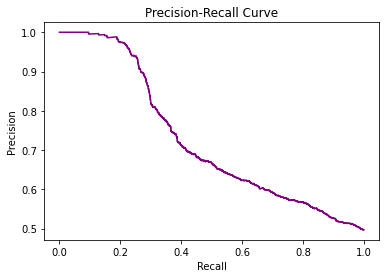

In [39]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, probs)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

|             | Regresión logística |      |   |   |
|:-----------:|:-------------------:|:----:|---|---|
|             |      Accuaracy      |  AUC |   |   |
|  Incial     |         0.62        | 0.57 |   |   |
| Balanceados |         0.79        | 0.68 |   |   |

### **K- Nearest Neighbors**

Luego, se calibra un algoritmo de K-NN con un parametro optimo de 12 como referencia y 
se obtiene un desempeño de 61.06% y un AUC de 0.64, y una mayor cantidad de articulos predichos bien como 50K.

In [41]:
#Inicializar el clasificador
knn_clas = KNeighborsClassifier()
#Definir las metricas de desempeño
acc_scorer = make_scorer(roc_auc_score, greater_is_better=True)
#La grilla de los parámetros de validación cruzada
param = {'n_neighbors': np.arange(12,50)}
#Inicializar la grilla de validación cruzada
n_folds = 5 ### k-fold CV

grid_objknn = GridSearchCV(estimator = knn_clas, param_grid = param, scoring = acc_scorer,
                       n_jobs = -1, cv = n_folds, return_train_score = True)
#Ajustar a los datos
knnFit = grid_objknn.fit(X_train, y_train)

# La mejor combinación de parametros
knn_clf_best = grid_objknn.best_estimator_
knn_clf_best

KNeighborsClassifier(n_neighbors=12)

In [42]:
knn_clf_best=KNeighborsClassifier(n_neighbors=12)
knn_clf_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [43]:
y_pred = knn_clf_best.predict(X_test)
accuracy_score(y_test,y_pred)


0.6106548279689235

AUC: 0.64


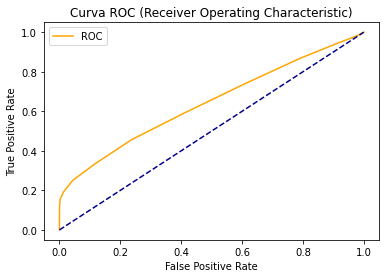

In [44]:
### Graficando Curva ROC
# predecir las probabilidades para el hold-out
probs = knn_clf_best.predict_proba(X_test)
# Mantener las probabilidades de la clase positiva (1)
probs = probs[:, 1]
# Calcular el AUC (Área bajo la curva ROC)
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
# Obtener la curva ROC
fpr, tpr, umbral = roc_curve(y_test, probs)
# Graficar la curva ROC
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend()
plt.show()

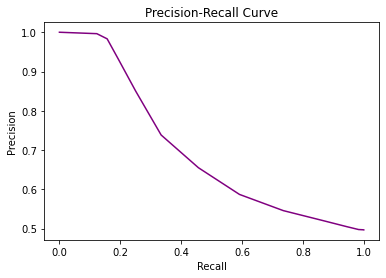

In [45]:
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, probs)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [46]:
pd.crosstab(y_test, y_pred)

col_0,0,1
50K,,
0,1729,538
1,1216,1022


|              | K- Nearest Neighbors |      |   |   |
|:------------:|:--------------------:|:----:|---|---|
|              |       Accuaracy      |  AUC |   |   |
| Balanceo     |         0.78         | 0.65 |   |   |
|Sin Balanceo  |         0.61         | 0.64 |   |   |

### Descision Tree

Finalmente, se realiza un modelo de arbol de clasificación con una semilla de 123456 y parametros seleccionados como min_samples_split igual a 3, un min_samples_leaf igual a 10 y una profundidad máxima de 11.

Y se obtiene un desempeño de 74.72% y un area bajo la curva de 0.62 y una mayor cantidad de observaciones predichas bien como populares.

In [47]:
# inicializar el algortimo
clf_tree = DecisionTreeClassifier(random_state = 123456)

# Definir Grilla de validación
parameters = [ {'max_depth':np.arange(2, 12),
               'min_samples_leaf': np.arange(5, 11),
                'min_samples_split': np.arange(3, 11)}]

# Definir medida de desempeño
acc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Grilla
grid_objtree = GridSearchCV(estimator = clf_tree, param_grid = parameters, scoring=acc_scorer, cv = 5, n_jobs=-1, 
                        return_train_score = True)
grid_objtree.fit(X_train, y_train)

# Set the clf to the best combination of parameters
tree_clf_best = grid_objtree.best_estimator_

In [48]:
tree_clf_best

DecisionTreeClassifier(max_depth=8, min_samples_leaf=7, min_samples_split=3,
                       random_state=123456)

In [49]:
y_pred=tree_clf_best.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred)

0.8133185349611542

AUC: 0.89


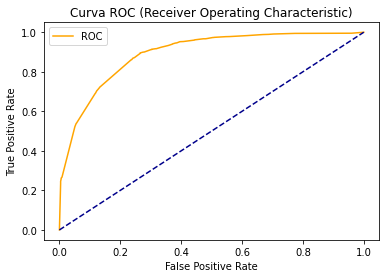

In [51]:
### Graficando Curva ROC
# predecir las probabilidades para el hold-out
probs = grid_objtree.predict_proba(X_test)
# Mantener las probabilidades de la clase positiva (1)
probs = probs[:, 1]
# Calcular el AUC (Área bajo la curva ROC)
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
# Obtener la curva ROC
fpr, tpr, umbral = roc_curve(y_test, probs)
# Graficar la curva ROC
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend()
plt.show()

In [52]:
pd.crosstab(y_test, y_pred)

col_0,0,1
50K,,
0,1667,600
1,241,1997


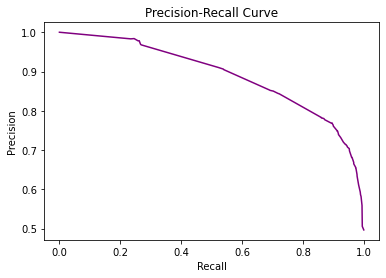

In [53]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, probs)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

|              | Decision Tree |      |   |   |
|:------------:|:-------------:|:----:|---|---|
|              |   Accuaracy   |  AUC |   |   |
| Balanceado   |      0.85     | 0.90 |   |   |
| Sin balanceo |      0.81     | 0.89 |   |   |

### Random Forest

Luego, se ejecuta un algoritmo de Random Forest con 70 arboles entrenando con sus parametros calibrados, obteniendose las siguientes opciones:

Un máximo de profundidad de los árboles igual a 11.

Un número mínimo de muestras requeridas para estar en un nodo hoja correspondiente a 6.

Un número mínimo de muestras requeridas para dividir un nodo interno, es decir para ser nodo padre igual a 3.

Dado lo anterior, se obtiene un accuracy correspondiente a 81.33% y un area bajo la curva AUC de 0.91, la más alta hasta el momento.

In [57]:
# inicializar el algortimo
clf_rf=RandomForestClassifier(random_state = 123456,n_estimators=70)

# Definir Grilla de validación
parameters = [{'max_depth':np.arange(4, 12),
               'min_samples_leaf': np.arange(2, 7),
                'min_samples_split': np.arange(3,7)}]

# Definir medida de desempeño
acc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Grilla
grid_objrf = GridSearchCV(estimator = clf_rf, param_grid = parameters, scoring=acc_scorer, cv = 10, n_jobs=-1, 
                        return_train_score = True)
grid_objrf.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_clf_best = grid_objrf.best_estimator_
rf_clf_best 

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=70, random_state=123456)

In [58]:
rf_clf_best= RandomForestClassifier(max_depth=11, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=70, random_state=123456)
rf_clf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=70, random_state=123456)

In [59]:
predict_rf= rf_clf_best.predict(X_test)
print("Random Forest - Accuracy sobre el hold-out:", round(accuracy_score(predict_rf, y_test), 7))

Random Forest - Accuracy sobre el hold-out: 0.8230855


In [60]:
accuracy_score(y_test,y_pred)

0.8133185349611542

AUC: 0.91


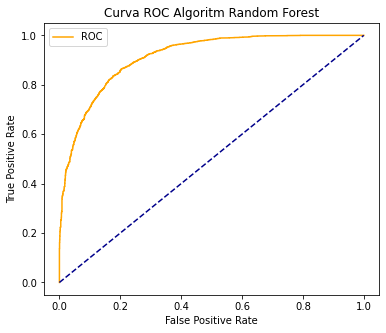

In [61]:
### Graficando Curva ROC
# predecir las probabilidades para el hold-out
probs = rf_clf_best.predict_proba(X_test)
# Mantener las probabilidades de la clase positiva (1)
probs = probs[:, 1]
# Calcular el AUC (Área bajo la curva ROC)
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
# Obtener la curva ROC
fpr, tpr, umbral = roc_curve(y_test, probs)
# Graficar la curva ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Algoritm Random Forest')
plt.legend()
plt.show()

De acuerdo a los resultados sobre las medidas de capacidad predictivo se concluye que el mejor modelo es correspondiente 
al modelo de regresión logística, con un accuracy mayor de 77.6%, lo que indicaría que acertó en el 77.6% de
los casos donde los articulos se consideran importantes o no. De esta misma forma obtiene un area bajo la curva más alto de 0.65 con respecto al obtenido por K-nn que fue de 0.59.